# Tutorial2: PyTorch basics

## Outline

- Datasets
- Models
- Losses
- Optimizers

Official resources:
* [Deep Learning with PyTorch: a 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [PyTorch documentation](https://pytorch.org/docs/stable/index.html)

Here no details, mostly visualization, with linear regression.

### Imports

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams.update({'font.size': 16})

In [6]:
x = torch.rand(20, 5)
x, x.shape

(tensor([[0.6294, 0.4830, 0.4581, 0.6408, 0.5255],
         [0.5518, 0.4144, 0.3209, 0.5201, 0.1489],
         [0.4391, 0.5812, 0.4945, 0.1291, 0.2050],
         [0.4148, 0.5519, 0.6049, 0.4715, 0.3608],
         [0.9000, 0.8225, 0.1838, 0.5097, 0.8941],
         [0.3827, 0.3026, 0.2125, 0.1760, 0.9919],
         [0.8112, 0.9371, 0.0438, 0.8624, 0.7611],
         [0.0748, 0.3886, 0.9514, 0.7687, 0.5658],
         [0.7411, 0.6231, 0.1825, 0.7497, 0.5180],
         [0.6238, 0.8825, 0.8129, 0.0759, 0.6756],
         [0.9374, 0.3009, 0.8292, 0.1268, 0.4188],
         [0.7885, 0.9722, 0.8878, 0.3475, 0.9349],
         [0.3793, 0.7934, 0.4070, 0.2156, 0.1478],
         [0.9099, 0.3670, 0.4841, 0.4465, 0.0941],
         [0.1497, 0.5763, 0.6628, 0.1908, 0.5893],
         [0.9414, 0.9050, 0.9040, 0.4398, 0.9696],
         [0.6744, 0.1648, 0.6537, 0.7565, 0.8677],
         [0.3840, 0.8127, 0.2707, 0.6900, 0.7951],
         [0.1093, 0.3010, 0.6560, 0.6110, 0.6861],
         [0.3664, 0.3109, 0.021

In [8]:
((x.norm(dim=1) - 1).abs() < 1e-10).float()
# 각 벡터의 길이가 1과 거의 같은지 확인하고, 그 결과를 0.0 또는 1.0으로 반환

# x.norm(dim=1): 각 row(벡터)의 L2 norm 계산
# (x.norm(dim=1) - 1): 각 벡터 길이가 1에서 얼마나 벗어났는지 계산
# (x.norm(dim=1) - 1).abs(): 길이가 1보다 크거나 작은 정도를 '절대값'으로 표현
# ((x.norm(dim=1) - 1).abs() < 1e-10): 길이가 거의 1과 같은 벡터인지 확인 (결과는 Boolean Tensor(True/False))
# ((x.norm(dim=1) - 1).abs() < 1e-10).float(): Boolean 값을 float로 변환 즉, 'True -> 1.0', 'False -> 0.0'

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Datasets

### A raw dataset

The data are obtained from the model
$$
x \mapsto y:=Ax + b
$$
with $x\in\mathbb R^{input\_dim}$ and $y\in\mathbb R^{output\_dim}$.

In [9]:
input_dim = 1
output_dim = 1

A = 2 * np.random.rand(output_dim, input_dim) - 1
b = 2 * np.random.rand(output_dim) - 1

true_model = lambda x: A @ x + b

In [14]:
np.random.rand(output_dim, input_dim), np.random.rand(output_dim), np.random.rand(output_dim, input_dim).shape, np.random.rand(output_dim).shape

(array([[0.66184908]]), array([0.86499912]), (1, 1), (1,))

In [ ]:
A, b, true_model, x

(array([[-0.4401765]]),
 array([-0.30565133]),
 <function __main__.<lambda>(x)>,
 tensor([[0.6294, 0.4830, 0.4581, 0.6408, 0.5255],
         [0.5518, 0.4144, 0.3209, 0.5201, 0.1489],
         [0.4391, 0.5812, 0.4945, 0.1291, 0.2050],
         [0.4148, 0.5519, 0.6049, 0.4715, 0.3608],
         [0.9000, 0.8225, 0.1838, 0.5097, 0.8941],
         [0.3827, 0.3026, 0.2125, 0.1760, 0.9919],
         [0.8112, 0.9371, 0.0438, 0.8624, 0.7611],
         [0.0748, 0.3886, 0.9514, 0.7687, 0.5658],
         [0.7411, 0.6231, 0.1825, 0.7497, 0.5180],
         [0.6238, 0.8825, 0.8129, 0.0759, 0.6756],
         [0.9374, 0.3009, 0.8292, 0.1268, 0.4188],
         [0.7885, 0.9722, 0.8878, 0.3475, 0.9349],
         [0.3793, 0.7934, 0.4070, 0.2156, 0.1478],
         [0.9099, 0.3670, 0.4841, 0.4465, 0.0941],
         [0.1497, 0.5763, 0.6628, 0.1908, 0.5893],
         [0.9414, 0.9050, 0.9040, 0.4398, 0.9696],
         [0.6744, 0.1648, 0.6537, 0.7565, 0.8677],
         [0.3840, 0.8127, 0.2707, 0.6900, 0.7951],
 

We get a training set by randomly sampling and noisy observations
\begin{align*}
&x_i \sim U([-1, 1])\\
&y_i = A x_i + b + \nu_i
\end{align*}

In [ ]:
n_train = 1000
noise_level = 0.04

# Generate a random set of n_train samples
X_train = np.random.rand(n_train, input_dim)
y_train = np.array([true_model(x) for x in X_train])

# Add some noise
y_train += noise_level * np.random.standard_normal(size=y_train.shape)
# np.random.standard_normal(size=y_train.shape): 표준 정규분포(평균 0, 표준편차 1)에서 y_train과 동일한 shape을 가진 난수 생성

In [17]:
X_train, X_train.shape

(array([[0.72901871],
        [0.29346701],
        [0.43117158],
        [0.54238547],
        [0.19419913],
        [0.3697032 ],
        [0.02931705],
        [0.64355508],
        [0.67717492],
        [0.22704692],
        [0.12980989],
        [0.78723886],
        [0.96290885],
        [0.98259471],
        [0.46419402],
        [0.85548867],
        [0.80414623],
        [0.41001171],
        [0.23448277],
        [0.00617077],
        [0.95805919],
        [0.68990131],
        [0.96083528],
        [0.37702785],
        [0.10922979],
        [0.54900565],
        [0.51839748],
        [0.52707421],
        [0.16085492],
        [0.12566994],
        [0.89773986],
        [0.53747761],
        [0.24303395],
        [0.29605657],
        [0.92692461],
        [0.86684487],
        [0.28759917],
        [0.75150941],
        [0.92476327],
        [0.63842439],
        [0.9636892 ],
        [0.67098626],
        [0.20764177],
        [0.90953111],
        [0.55368128],
        [0

In [18]:
y_train, y_train.shape

(array([[-0.61109882],
        [-0.46461297],
        [-0.51950216],
        [-0.5583106 ],
        [-0.36692967],
        [-0.42371312],
        [-0.3265916 ],
        [-0.63814487],
        [-0.55015185],
        [-0.35759298],
        [-0.37403452],
        [-0.61746611],
        [-0.70784511],
        [-0.76688023],
        [-0.53895442],
        [-0.6466438 ],
        [-0.66061136],
        [-0.5447551 ],
        [-0.41117185],
        [-0.30017624],
        [-0.75589428],
        [-0.6463958 ],
        [-0.73528389],
        [-0.51957689],
        [-0.3160516 ],
        [-0.57864539],
        [-0.52475402],
        [-0.5600331 ],
        [-0.49547239],
        [-0.26003268],
        [-0.68789247],
        [-0.57161866],
        [-0.42909458],
        [-0.41109036],
        [-0.67245543],
        [-0.70131082],
        [-0.48746323],
        [-0.57735421],
        [-0.66464473],
        [-0.58495704],
        [-0.74691085],
        [-0.60492475],
        [-0.36707706],
        [-0

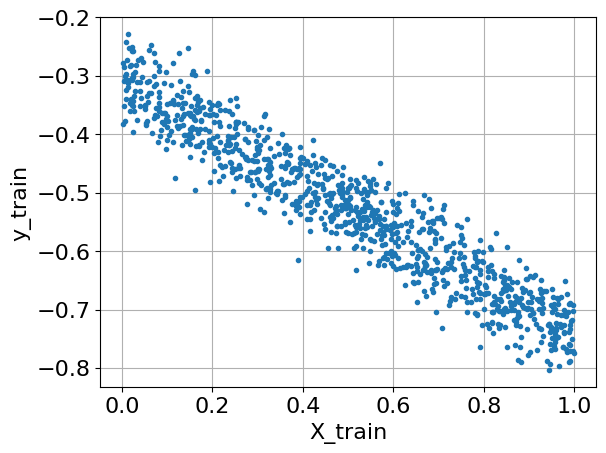

In [19]:
if input_dim == output_dim == 1:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.plot(X_train, y_train, '.')
    ax.grid(True)
    ax.set_xlabel('X_train')
    ax.set_ylabel('y_train')

### PyTorch `Dataset`

In [21]:
# Dataset to manage vector to vector data
class VectorialDataset(torch.utils.data.Dataset):
    def __init__(self, input_data, output_data):
        super(VectorialDataset, self).__init__()
        self.input_data = torch.tensor(input_data.astype('f'))
        self.output_data = torch.tensor(output_data.astype('f'))
        # astype('f'): 데이터(np.ndarray)를 float32 형식으로 변환
        # torch.tensor(...): 변환된 float32 numpy 배열을 PyTorch 텐서로 변환
        # PyTorch 모델은 대부분 float32 형식의 텐서를 입력으로 받음. (int32나 float64이면 연산에서 에러나 성능 저하 발생 가능)

    def __len__(self):
        return self.input_data.shape[0]

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()  # 텐서를 리스트로 변환
        sample = (self.input_data[idx, :],
                  self.output_data[idx, :])  
            # 입력과 출력에서 같은 idx 행을 선택하여 튜플로 반환 (x, y)
        return sample

In [24]:
training_set = VectorialDataset(input_data=X_train, output_data=y_train)

In [25]:
len(training_set)

1000

In [29]:
training_set[0]

(tensor([0.7290]), tensor([-0.6111]))

In [30]:
training_set[10:12]

(tensor([[0.1298],
         [0.7872]]),
 tensor([[-0.3740],
         [-0.6175]]))

Here almost useless, but think about e.g. images.

### PyTorch `DataLoader`

In [31]:
batch_size = 120
train_loader = torch.utils.data.DataLoader(training_set,
                                           batch_size=batch_size,
                                           shuffle=True)

The role of `batch_size`:

In [ ]:
len(train_loader), len(train_loader.dataset), len(train_loader.dataset) / batch_size
# 1000 / 120 = 8.33 -> 9
# 1000개의 데이터를 120개씩 나누면 8개의 full batch와 1개의 partial batch가 생김

(9, 1000, 8.333333333333334)

In [36]:
for idx, batch in enumerate(train_loader):
    print('Batch n. %2d: input size=%s, output size=%s' % (idx+1, batch[0].shape, batch[1].shape))
# train_loader: (idx, (input_batch, output_batch)) 형태의 튜플

Batch n.  1: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  2: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  3: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  4: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  5: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  6: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  7: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  8: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  9: input size=torch.Size([40, 1]), output size=torch.Size([40, 1])


In [40]:
batch[0]

tensor([[0.3595],
        [0.4263],
        [0.9700],
        [0.4766],
        [0.9028],
        [0.3237],
        [0.5106],
        [0.4150],
        [0.5700],
        [0.2929],
        [0.7756],
        [0.5831],
        [0.3750],
        [0.7879],
        [0.9993],
        [0.6682],
        [0.4846],
        [0.4994],
        [0.4418],
        [0.8969],
        [0.9970],
        [0.5672],
        [0.4575],
        [0.1641],
        [0.1839],
        [0.8372],
        [0.7790],
        [0.0513],
        [0.2518],
        [0.5346],
        [0.0554],
        [0.9038],
        [0.9783],
        [0.5442],
        [0.1848],
        [0.9616],
        [0.0833],
        [0.4631],
        [0.9815],
        [0.6848]])

The role of `shuffle`:

In [49]:
first_batch = []

for epoch in range(2):
    for idx, batch in enumerate(train_loader):
        if idx == 0:
            first_batch.append(batch)

np.c_[X_train[:batch_size], first_batch[0][0].numpy(), first_batch[1][0].numpy()]
# .c_: numpy 배열을 열(axis=1) 방향으로 합침(concatenate)

array([[0.72901871, 0.90108299, 0.15273102],
       [0.29346701, 0.92985201, 0.49431503],
       [0.43117158, 0.68689054, 0.89600354],
       [0.54238547, 0.78391445, 0.29359075],
       [0.19419913, 0.92476326, 0.50470382],
       [0.3697032 , 0.00617077, 0.52089399],
       [0.02931705, 0.4630585 , 0.20116423],
       [0.64355508, 0.52089399, 0.42691186],
       [0.67717492, 0.16490595, 0.2349353 ],
       [0.22704692, 0.30033192, 0.65177792],
       [0.12980989, 0.70892751, 0.22998638],
       [0.78723886, 0.02889312, 0.60306603],
       [0.96290885, 0.00265408, 0.24371234],
       [0.98259471, 0.08308995, 0.66823107],
       [0.46419402, 0.42633224, 0.94540954],
       [0.85548867, 0.95031768, 0.55076241],
       [0.80414623, 0.3211365 , 0.32962161],
       [0.41001171, 0.74885511, 0.53442228],
       [0.23448277, 0.41796476, 0.92204034],
       [0.00617077, 0.57351238, 0.02455856],
       [0.95805919, 0.16576314, 0.50153983],
       [0.68990131, 0.63362181, 0.94701171],
       [0.

In [52]:
first_batch[0]

[tensor([[0.9011],
         [0.9299],
         [0.6869],
         [0.7839],
         [0.9248],
         [0.0062],
         [0.4631],
         [0.5209],
         [0.1649],
         [0.3003],
         [0.7089],
         [0.0289],
         [0.0027],
         [0.0831],
         [0.4263],
         [0.9503],
         [0.3211],
         [0.7489],
         [0.4180],
         [0.5735],
         [0.1658],
         [0.6336],
         [0.1931],
         [0.2982],
         [0.5881],
         [0.5759],
         [0.8522],
         [0.1292],
         [0.1509],
         [0.1294],
         [0.4759],
         [0.1355],
         [0.3928],
         [0.5263],
         [0.4745],
         [0.6730],
         [0.6073],
         [0.8987],
         [0.2399],
         [0.9608],
         [0.7290],
         [0.8819],
         [0.7183],
         [0.9131],
         [0.2776],
         [0.2983],
         [0.0054],
         [0.9278],
         [0.0974],
         [0.6057],
         [0.2166],
         [0.9743],
         [0.

In [53]:
batch[1]

tensor([[-0.6942],
        [-0.3546],
        [-0.3906],
        [-0.7159],
        [-0.5022],
        [-0.6381],
        [-0.5230],
        [-0.4828],
        [-0.6535],
        [-0.6818],
        [-0.7031],
        [-0.6875],
        [-0.7041],
        [-0.4838],
        [-0.6496],
        [-0.4693],
        [-0.4595],
        [-0.4002],
        [-0.7265],
        [-0.4429],
        [-0.6885],
        [-0.5600],
        [-0.4863],
        [-0.4977],
        [-0.5086],
        [-0.4832],
        [-0.3806],
        [-0.4443],
        [-0.5443],
        [-0.7260],
        [-0.4467],
        [-0.4103],
        [-0.7071],
        [-0.6137],
        [-0.6263],
        [-0.6381],
        [-0.6993],
        [-0.6912],
        [-0.7724],
        [-0.5325]])

In [57]:
first_batch[0][0].shape

torch.Size([120, 1])

## Models

We implement a linear model $$x \mapsto model(x):=A x + b$$

with $A\in \mathbb{R}^{input\_dim\times output\_dim}$, $b\in\mathbb{R}^{output\_dim}$.

In [58]:
import torch.nn as nn
import torch

# Linear layer
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.linear = nn.Linear(self.input_dim, self.output_dim, bias=True)

    def forward(self, x):
        out = self.linear(x)
        return out

    def reset(self):
        self.linear.reset_parameters()

In [59]:
model = LinearModel(input_dim, output_dim)

### Model inspection

In [61]:
print(model)

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


See [pytorch.org/docs/stable/nn.html](https://pytorch.org/docs/stable/nn.html) for many other layers.

In [62]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3942]], requires_grad=True),
 Parameter containing:
 tensor([0.0967], requires_grad=True)]

In [63]:
model.linear.weight

Parameter containing:
tensor([[0.3942]], requires_grad=True)

In [64]:
model.linear.bias

Parameter containing:
tensor([0.0967], requires_grad=True)

### The `forward` method

In [65]:
x = torch.randn(5, input_dim)
model.forward(x)

tensor([[ 0.4736],
        [-0.2526],
        [ 0.5802],
        [-0.5430],
        [ 0.0677]], grad_fn=<AddmmBackward0>)

In [66]:
x

tensor([[ 0.9561],
        [-0.8861],
        [ 1.2267],
        [-1.6230],
        [-0.0736]])

In [67]:
[model.linear.weight @ xx + model.linear.bias for xx in x]

[tensor([0.4736], grad_fn=<AddBackward0>),
 tensor([-0.2526], grad_fn=<AddBackward0>),
 tensor([0.5802], grad_fn=<AddBackward0>),
 tensor([-0.5430], grad_fn=<AddBackward0>),
 tensor([0.0677], grad_fn=<AddBackward0>)]

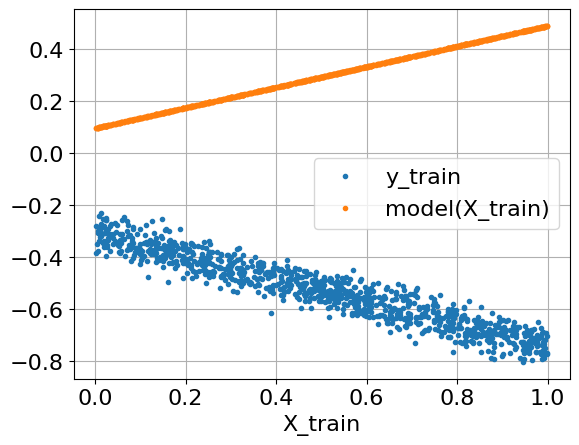

In [68]:
if input_dim == output_dim == 1:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.plot(training_set.input_data, training_set.output_data, '.')
    ax.plot(training_set.input_data, model.forward(training_set.input_data).detach().numpy(), '.')
    ax.grid(True)
    ax.set_xlabel('X_train')
    ax.legend(['y_train', 'model(X_train)'])

## Losses

### The MSE loss

The MSE loss is
$$
L(y, y') = \|y-y'\|_2^2
$$

In [69]:
import torch.nn as nn
loss_fun = nn.MSELoss(reduction='mean')

More at [pytorch.org/docs/stable/nn.html#loss-functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [70]:
x = torch.tensor(np.array([1, 2, 1]).astype('f'))
z = torch.tensor(np.array([0, 0, 0]).astype('f'))
loss_fun(x, z)

tensor(2.)

### Giving a score to the model (parameters) given the training set

The loss for one data pair $(x_i, y_i)$ is
$$
L(model(x_i), y_i)
$$

The cumulative (average) loss on the training set is
$$
L(X_{train}, y_{train}):=\frac{1}{n_{train}} \sum_{i=1}^{n_{train}} L(model(x_i), y_i)
$$

C:\Users\user\AppData\Local\Temp\ipykernel_984\560124969.py:13: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  loss_values[i, j] = loss_fun(model.forward(training_set.input_data),  training_set.output_data)


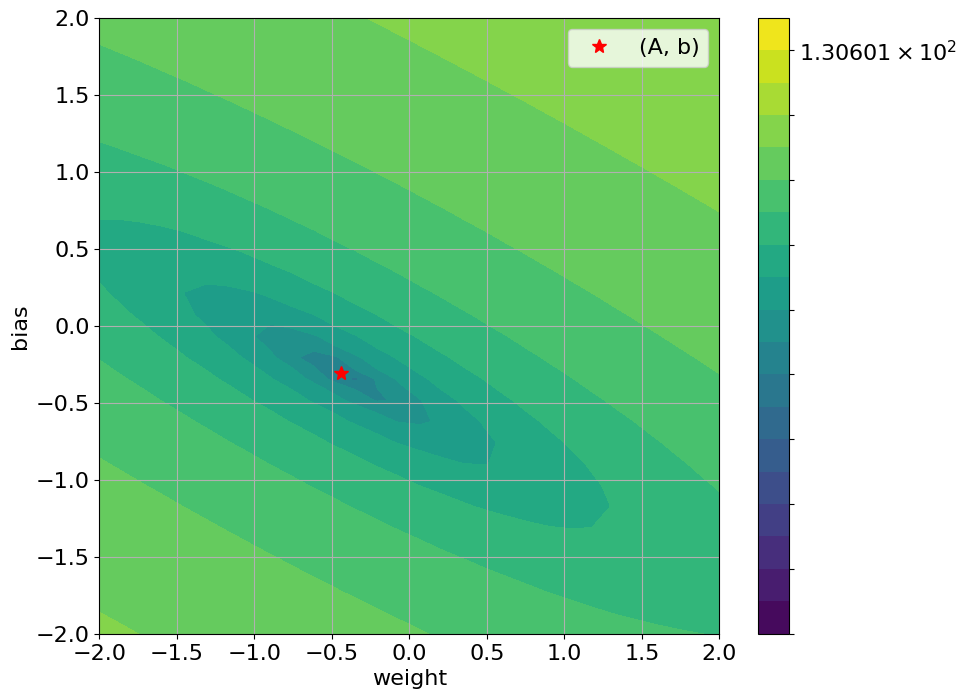

In [72]:
if input_dim == output_dim == 1:

    state_dict = model.state_dict()

    ww, bb = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))

    loss_values = 0 * ww
    for i in range(ww.shape[0]):
        for j in range(ww.shape[1]):
            state_dict['linear.weight'] = torch.tensor([[ww[i, j]]])
            state_dict['linear.bias'] = torch.tensor([bb[i, j]])
            model.load_state_dict(state_dict)
            loss_values[i, j] = loss_fun(model.forward(training_set.input_data),  training_set.output_data)

    fig = plt.figure(figsize=(10, 8))
    fig.clf()
    ax = fig.gca()
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    c=ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    plt.colorbar(c)
    ax.plot(A[0], b, 'r*', markersize=10)
    ax.set_ylabel('bias')
    ax.set_xlabel('weight')
    ax.legend(['(A, b)'])

    ax.grid(True)

## Optimization

Goal: minimize the loss given the data:
$$
\min\limits_{par \in model} L(X_{train}, y_{train})
=\min\limits_{par \in model} \frac{1}{n_{train}} \sum_{i=1}^{n_{train}} L(x_i, model(x_i))
$$

In this case $par =\{A, b\}$.

Iterative gradient based optimization:
\begin{align*}
par^{(0)} &= par_0\\
par^{(k+1)} &=  par^{(k)} - \eta^{(k)} \nabla_{par} L(X_{train}, y_{train})
\end{align*}    
with learning rate $\eta^{(k)}$.

### Gradients

The model is
$$
model(x) = A x + b
$$

With $input\_dim = output\_dim = 1$ we have $A:=a\in\mathbb{R},\ b\in\mathbb{R}$.

For a data pair $(x, y)$ the loss is
\begin{align*}
L(x, y)
&= \|model(x)-y\|_2^2\\
&= (model(x)-y)^2\\
&= (a x + b - y)^2\\
&= a^2 x^2 + 2 a b x - 2 a xy + b^2 -2 b y + y^2.
\end{align*}

We can compute
\begin{align*}
\nabla_a L(x, y)
&= 2 a x^2 + 2 b x - 2 xy
=2 x (a x + b - y)\\
\nabla_b L(x, y)
&= 2 a x + 2 b - 2 y
= 2 (ax + b - y).
\end{align*}


In [73]:
x = torch.randn(1, input_dim)
y =  torch.randn(1, output_dim)

model.zero_grad()
loss = loss_fun(model.forward(x),  y)
loss.backward()

In [74]:
if input_dim == output_dim == 1:
    print(model.linear.weight.grad)
    print(2 * x * (model.linear.weight * x + model.linear.bias - y))

    print(model.linear.bias.grad)
    print(2 * (model.linear.weight * x + model.linear.bias - y))

tensor([[3.8515]])
tensor([[3.8515]], grad_fn=<MulBackward0>)
tensor([5.3857])
tensor([[5.3857]], grad_fn=<MulBackward0>)


### Handmade optimization

In [75]:
if input_dim == output_dim == 1:

    num_iter = 200
    lr = 0.5 # 0.01

    train_hist = {}
    train_hist['weight'] = []
    train_hist['bias'] = []

    model.reset()
    state_dict = model.state_dict()

    for _ in range(num_iter):

        model.zero_grad()
        loss = loss_fun(model.forward(training_set.input_data), training_set.output_data)
        loss.backward()

        w = model.linear.weight.item()
        b = model.linear.bias.item()

        dw = model.linear.weight.grad.item()
        db = model.linear.bias.grad.item()

        state_dict['linear.weight'] += torch.tensor([-lr * dw])
        state_dict['linear.bias'] += torch.tensor([-lr * db])
        model.load_state_dict(state_dict)

        train_hist['weight'].append(w)
        train_hist['bias'].append(b)

    for label in train_hist:
        train_hist[label] = np.array(train_hist[label])

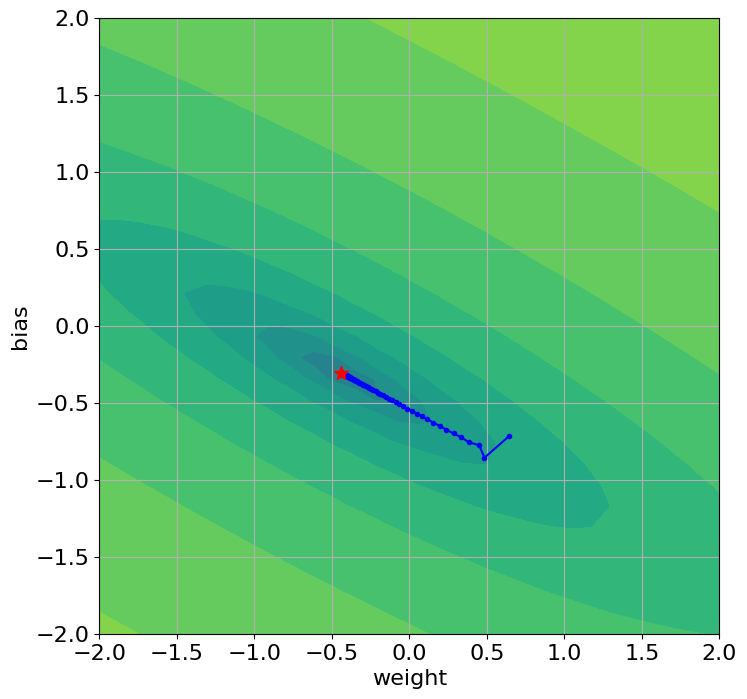

In [76]:
if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(8, 8))
    fig.clf()
    ax = fig.gca()
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    ax.grid(True)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)

    #ax.legend(['optim', '(A, b)'])

### Stochastic GD

* Avoid loading the full training set
* Avoid evaluating the model on the full training set

At every step, compute the loss on a batch of data $(X^{(k)}, y^{(k)})\sim (X_{train}, y_{train})$:

\begin{align*}
L(X^{(k)}, y^{(k)}) := \sum_{(x, y) \in (X^{(k)}, y^{(k)})} L(x, model(x)).
\end{align*}    

and then update with this approximated gradient:
\begin{align*}
par^{(k+1)} &=  par^{(k)} - \eta^{(k)} \nabla_{par} L(X^{(k)}, y^{(k)}).
\end{align*}    

### PyTorch `optim`

In [77]:
lr = 0.1
weight_decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

More at [pytorch.org/docs/stable/optim.html](https://pytorch.org/docs/stable/optim.html).

In [78]:
n_epochs = 100

In [79]:
train_hist = {}
train_hist['loss'] = []

if input_dim == output_dim == 1:
    train_hist['weight'] = []
    train_hist['bias'] = []

# Initialize training
model.reset()
model.train()

for epoch in range(n_epochs):
    for idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        loss = loss_fun(model.forward(batch[0]),  batch[1])
        loss.backward()
        optimizer.step()

        train_hist['loss'].append(loss.item())
        if input_dim == output_dim == 1:
            train_hist['weight'].append(model.linear.weight.item())
            train_hist['bias'].append(model.linear.bias.item())

        print('[Epoch %4d/%4d] [Batch %4d/%4d] Loss: % 2.2e' % (epoch + 1, n_epochs,
                                                                idx + 1, len(train_loader),
                                                                loss.item()))

model.eval()

[Epoch    1/ 100] [Batch    1/   9] Loss:  3.73e-01
[Epoch    1/ 100] [Batch    2/   9] Loss:  2.33e-01
[Epoch    1/ 100] [Batch    3/   9] Loss:  1.10e-01
[Epoch    1/ 100] [Batch    4/   9] Loss:  6.04e-02
[Epoch    1/ 100] [Batch    5/   9] Loss:  4.61e-02
[Epoch    1/ 100] [Batch    6/   9] Loss:  5.92e-02
[Epoch    1/ 100] [Batch    7/   9] Loss:  8.02e-02
[Epoch    1/ 100] [Batch    8/   9] Loss:  1.01e-01
[Epoch    1/ 100] [Batch    9/   9] Loss:  1.15e-01
[Epoch    2/ 100] [Batch    1/   9] Loss:  9.38e-02
[Epoch    2/ 100] [Batch    2/   9] Loss:  7.49e-02
[Epoch    2/ 100] [Batch    3/   9] Loss:  6.10e-02
[Epoch    2/ 100] [Batch    4/   9] Loss:  4.80e-02
[Epoch    2/ 100] [Batch    5/   9] Loss:  2.99e-02
[Epoch    2/ 100] [Batch    6/   9] Loss:  2.54e-02
[Epoch    2/ 100] [Batch    7/   9] Loss:  2.57e-02
[Epoch    2/ 100] [Batch    8/   9] Loss:  2.48e-02
[Epoch    2/ 100] [Batch    9/   9] Loss:  3.49e-02
[Epoch    3/ 100] [Batch    1/   9] Loss:  3.65e-02
[Epoch    3/

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [80]:
if input_dim == output_dim == 1:
    n_test = 500
    X_test = np.random.rand(n_test, input_dim)
    y_pred = []

    state_dict = model.state_dict()

    for idx in range(len(train_hist['weight'])):
        state_dict['linear.weight'] = torch.tensor([[train_hist['weight'][idx]]])
        state_dict['linear.bias'] = torch.tensor([train_hist['bias'][idx]])
        model.load_state_dict(state_dict)

        y_pred.append(model.forward(torch.tensor(X_test.astype('f'))).detach().numpy())

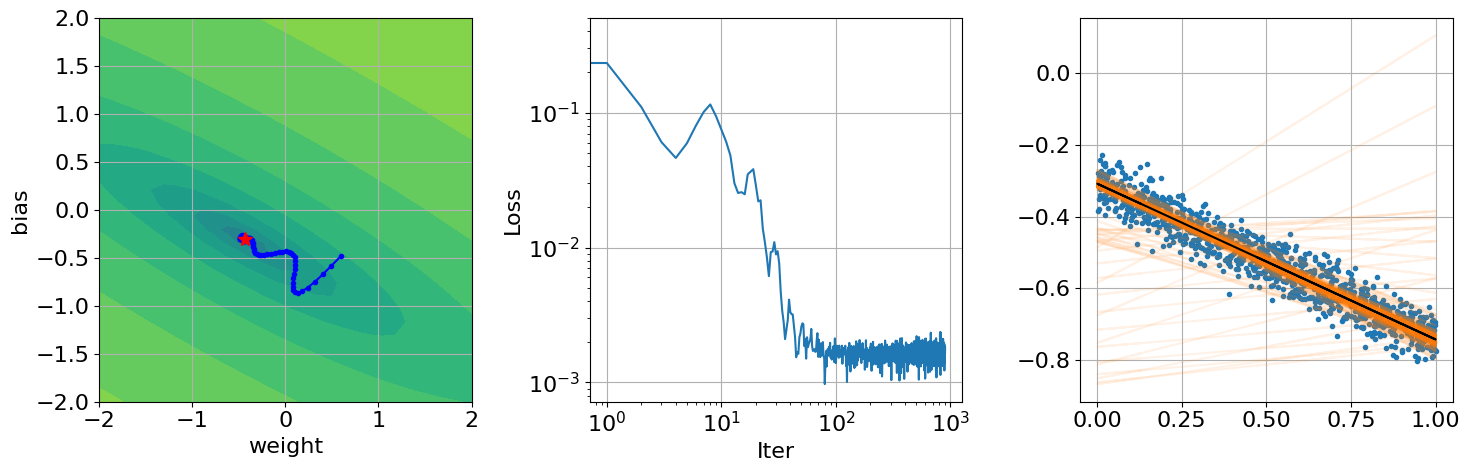

In [81]:
if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(15, 5))
    fig.clf()

    ax = fig.add_subplot(1, 3, 1)
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    #ax.legend(['optim', '(A, b)'])
    ax.grid(True)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    ax = fig.add_subplot(1, 3, 2)
    ax.loglog(np.abs(train_hist['loss']))
    ax.set_xlabel('Iter')
    ax.set_ylabel('Loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 3, 3)
    ax.plot(X_train, y_train, '.')
    a=ax.plot(X_test, y_pred[0], '-', alpha=0.1)
    for y in y_pred[1:]:
        ax.plot(X_test, y, '-', alpha=0.1, color=a[0].get_color())
    ax.plot(X_test, y_pred[-1], 'k')
    ax.grid(True)

    fig.tight_layout()

else:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.loglog(np.abs(train_hist['loss']))
    ax.set_xlabel('Iter')
    ax.set_ylabel('Loss')
    ax.grid(True)

In [83]:
train_hist.keys()

dict_keys(['loss', 'weight', 'bias'])

In [93]:
len(train_hist['loss']), train_hist['loss'][:10]

(900,
 [0.3734267055988312,
  0.23327231407165527,
  0.11015425622463226,
  0.060441628098487854,
  0.04614410549402237,
  0.05922973155975342,
  0.08024309575557709,
  0.10099401324987411,
  0.11500976234674454,
  0.09380733221769333])